# 读取文件

In [1]:
import pandas as pd
df=pd.read_csv('data/iris.txt',sep='\t')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
??pd.read_csv()

In [5]:
df.to_csv('data/iris2.txt')

In [8]:
df=pd.read_csv('data/iris.csv')
df.to_csv('data/iris3.csv')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df = pd.read_excel('data/iris.xls')
df.to_excel('data/iris4.xls')

D:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:124: UserWarning: Pandas requires version '0.9.8' or newer of 'xlsxwriter' (version '0.9.6' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
import numpy as np
from sqlalchemy import create_engine

In [5]:
frame = pd.DataFrame(np.arange(20).reshape(4,5),
                     columns=['white', 'red', 'blue', 'black', 'green'])
frame

,white,red,blue,black,green
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [6]:
engine= create_engine('sqlite:///test.db')  

In [7]:
frame.to_sql('colors', engine) # 一次性存数据,无需预定义ORM

In [8]:
frame = pd.read_sql('colors', engine)
frame

,index,white,red,blue,black,green
0,0,0,1,2,3,4
1,1,5,6,7,8,9
2,2,10,11,12,13,14
3,3,15,16,17,18,19


In [9]:
# 获取方式二
import sqlite3

In [10]:
conn = sqlite3.connect("test.db")

In [11]:
frame = pd.read_sql("select * from colors", conn)
frame

,index,white,red,blue,black,green
0,0,0,1,2,3,4
1,1,5,6,7,8,9
2,2,10,11,12,13,14
3,3,15,16,17,18,19


In [ ]:
import numpy as np
from sqlalchemy import create_engine
# 生成测试数据
frame = pd.DataFrame(np.arange(20).reshape(4,5),
                     columns=['white', 'red', 'blue', 'black', 'green'])
# 方式一：使用sqlalchemy库
engine= create_engine('sqlite:///test.db')
frame.to_sql('colors', engine) # 一次性存数据,无需预定义ORM
frame = pd.read_sql('colors', engine) # 读取表单所有数据
# 获取方式二
import sqlite3
conn = sqlite3.connect("test.db")
frame = pd.read_sql("select * from colors", conn)

In [13]:
??frame.to_sql

In [ ]:
import pandas as pd
import pymongo
# 读取数据，连接mongoDB数据库
client = pymongo.MongoClient(host= host, port= port)
db_auth = client[mongo_db]
db_auth.authenticate(user, pw)
db = client[mongo_db]
# 连接est表单
collection = db['test']
# 读取表单数据
data = pd.DataFrame(list(collection.find()))
import json
# 保存数据，连接mongoDB数据库
client = pymongo.MongoClient(host= host, port= port)
db_auth = client[mongo_db]
db_auth.authenticate(user, pw)
db = client[mongo_db]
# 创建表单
collection = db['test']
# 创建测试数据
df = pd.DataFrame(np.arange(12).reshape((3,4)))
data = json.loads(df.T.to_json()).values()
collection.insert_many(data) # 当df数据较大时，可以分块处理

# 描述性统计

In [3]:
import pandas as pd
iris=pd.read_csv('data/iris.csv')


In [4]:
iris.head() # 数据前五行

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail()# 数据后五行

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.shape  # 数据行列数

(150, 5)

In [7]:
iris.info() # 数据整体信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe() # 描述性统计

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


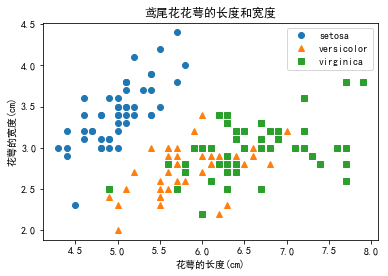

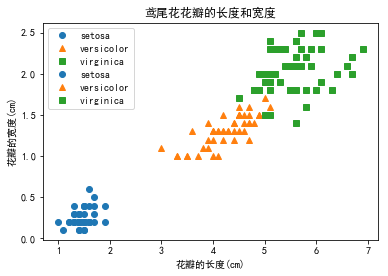

In [17]:
from collections import Counter, defaultdict
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import datasets
iris_datas = datasets.load_iris()
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
style_list = ['o', '^', 's']       # 设置点的不同形状，不同形状默认颜色不同，也可自定义
data = iris_datas.data
labels = iris_datas.target_names
cc = defaultdict(list)
for i, d in enumerate(data):
    cc[labels[int(i/50)]].append(d) 
p_list = []
c_list = []
for each in [0, 2]:
    for i, (c, ds) in enumerate(cc.items()):
        draw_data = np.array(ds)
        p = plt.plot(draw_data[:, each], draw_data[:, each+1], style_list[i])
        p_list.append(p)
        c_list.append(c)
 
    plt.legend(map(lambda x: x[0], p_list), c_list)
    plt.title('鸢尾花花瓣的长度和宽度') if each else plt.title('鸢尾花花萼的长度和宽度')
    plt.xlabel('花瓣的长度(cm)') if each else plt.xlabel('花萼的长度(cm)')
    plt.ylabel('花瓣的宽度(cm)') if each else plt.ylabel('花萼的宽度(cm)')
    plt.show()

# 对比分析

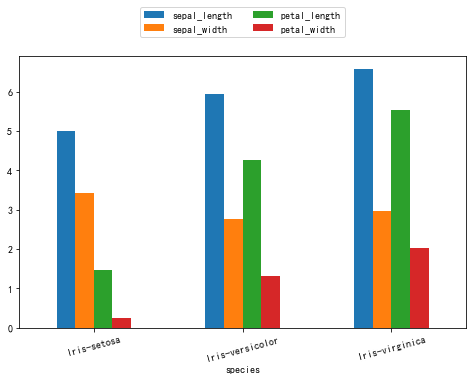

In [19]:
import pandas as pd
from pandas import set_option
iris_data=pd.read_csv('data/iris.csv') # 读取数据
# 用不同的花的类别分成不同的组，此数据为三组
grouped_data=iris_data.groupby("species")
group_mean=grouped_data.mean() #求 组平均值
group_mean.plot(kind="bar",rot=15,figsize=(8, 5))
plt.legend(loc="upper center",bbox_to_anchor=(0.5,1.2),ncol=2)
plt.show()

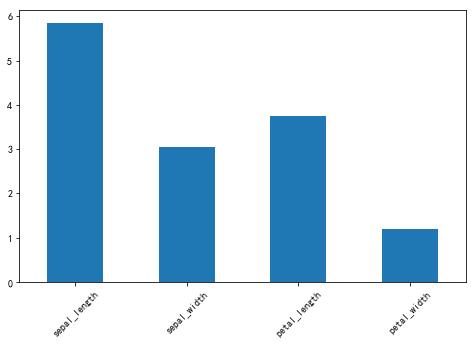

In [20]:
iris_mean=iris_data.mean()
iris_mean.plot(kind="bar",rot=45,figsize=(8, 5))
plt.show()

# 相关性分析

In [21]:
import pandas as pd
from pandas import set_option
iris=pd.read_csv('data/iris.csv')
set_option('precision', 2) # 设置数据的精确度
iris.corr(method='pearson') # 皮尔森相关性

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


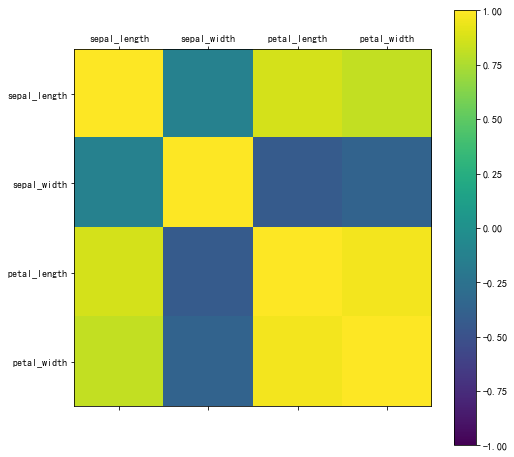

In [22]:
correlations = iris.corr(method='pearson')
names = correlations.columns.tolist()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 4, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# 分布分析

In [22]:
import pandas as pd
from pandas import set_option
iris=pd.read_csv('data/iris.csv')
set_option('precision', 2) # 设置数据的精确度
print(iris.skew()) # 偏度
print(iris.kurt()) # 峰度 

sepal_length    0.31
sepal_width     0.32
petal_length   -0.27
petal_width    -0.10
dtype: float64 sepal_length   -0.55
sepal_width     0.23
petal_length   -1.40
petal_width    -1.34
dtype: float64


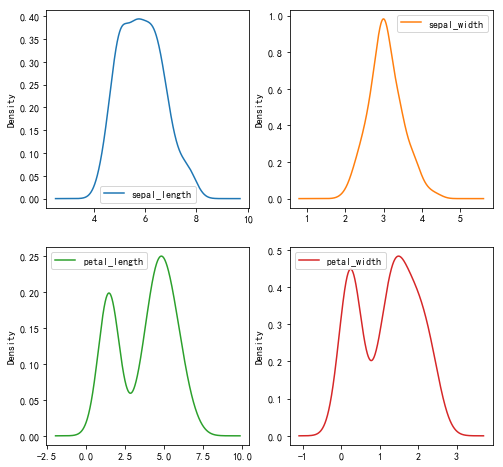

In [24]:
iris.plot(kind='density', subplots=True, layout=(2,2), sharex=False,figsize=(8, 8))
plt.show()

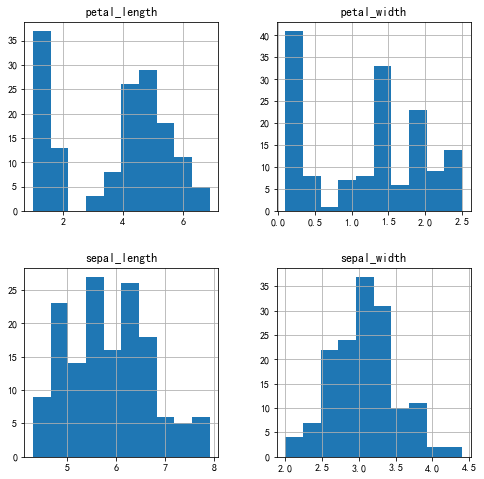

In [23]:
iris.hist(figsize=(8, 8))
plt.show()